The following objects are masked from data (pos = 3):

    complete, crbnBlk, EB2B, interBelt, peelForce, survival, tireAge,
    wedge




Call:
coxph(formula = Surv(survival, complete) ~ wedge, data = data)

  n= 34, number of events= 11 

           coef exp(coef)  se(coef)      z Pr(>|z|)  
wedge -5.664960  0.003465  2.275842 -2.489   0.0128 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

      exp(coef) exp(-coef) lower .95 upper .95
wedge  0.003465      288.6 4.004e-05    0.2999

Concordance= 0.744  (se = 0.103 )
Likelihood ratio test= 7.18  on 1 df,   p=0.007
Wald test            = 6.2  on 1 df,   p=0.01
Score (logrank) test = 6.32  on 1 df,   p=0.01


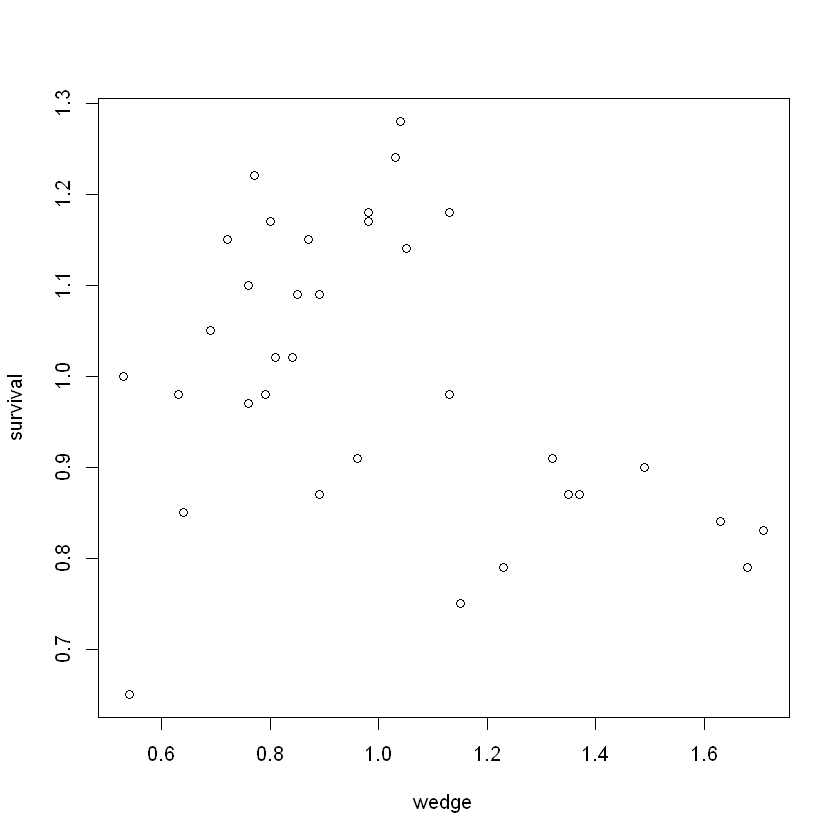

In [3]:
### Survival Data Models
### 2021
### Babatunde Adewumi
### Assignment 6


### 1

data<-read.table("tirereliability.txt", sep="\t", dec=".", header=TRUE)
attach(data)

plot(wedge, survival)
library(survival)

model.cox<-coxph(Surv(survival, complete)~wedge, data=data)
summary(model.cox)

wedge 
-5.66496

Call: survfit(formula = model.cox, newdata = newdata)

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    1     17       5    0.481   0.189        0.223            1

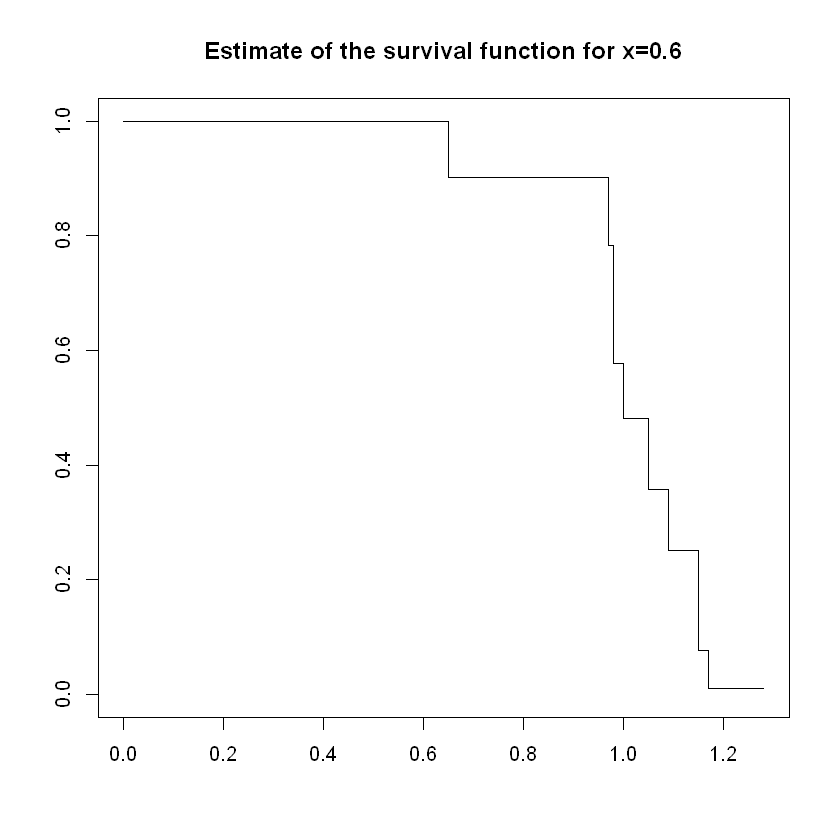

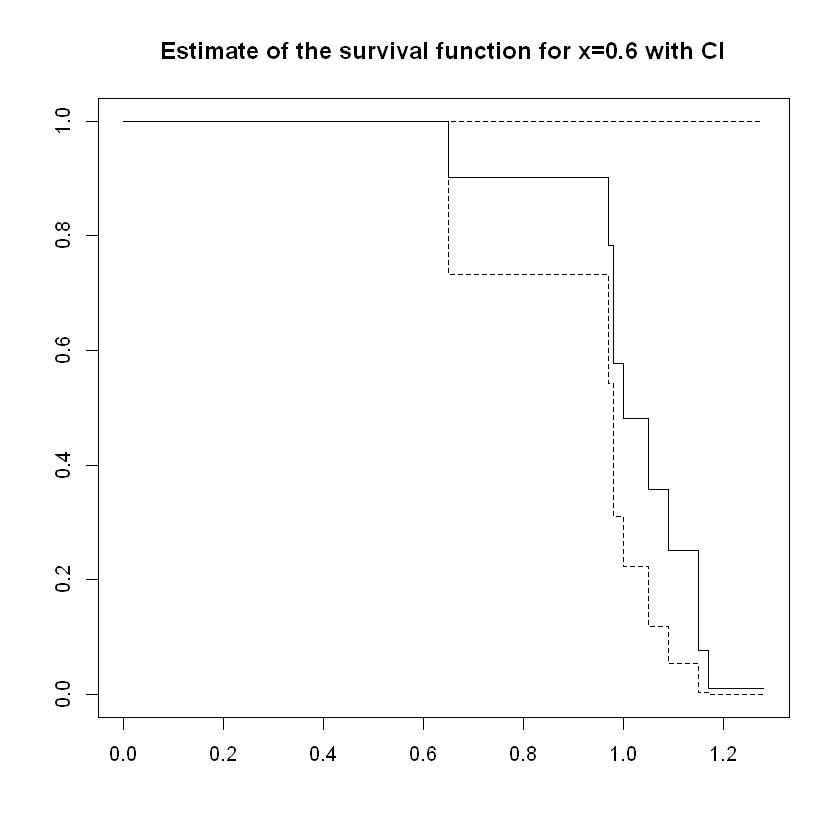

In [4]:
### a)
# Estimate of the parameter beta
coef(model.cox)

# wedge 
# -5.66496

### b)

newdata<-data.frame(wedge=0.6)
sf<-survfit(model.cox, newdata=newdata)
summary(sf, times=1.00)

# Call: survfit(formula = model.cox, newdata = newdata)
# 
# time n.risk n.event survival std.err lower 95% CI upper 95% CI
# 1     17       5    0.481   0.189        0.223            1

plot(sf,conf.int=c("none"), main="Estimate of the survival function for x=0.6")
plot(sf, main="Estimate of the survival function for x=0.6 with CI")
bhest <- basehaz(model.cox) # estimate for the baseline hazard

1 
288.5765

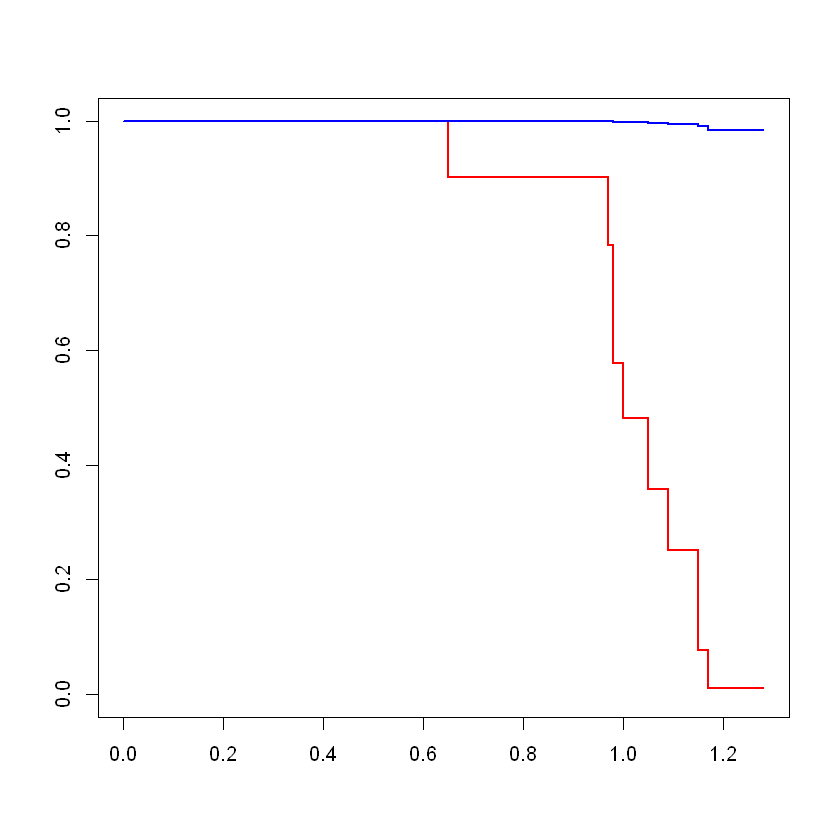

In [5]:
### c)

newdata<-data.frame(wedge=c(0.6,1.6))
risk<-predict(model.cox, newdata=newdata, type="risk")
risk[1]/risk[2] # estimate of the hazard ratio = 288.5765 

# just a side stuff
sf1<- survfit(model.cox, newdata = newdata)
surv.curve <- summary(sf1, times =seq(0,2,0.001))
plot(sf1, conf.int = c("none"))
lines(surv.curve$time, surv.curve$surv[,1], col="red", lwd=2)
lines(surv.curve$time, surv.curve$surv[,2], col="blue", lwd=2)

In [6]:
### d)

model.H1<-coxph(Surv(survival, complete)~wedge+peelForce+interBelt+wedge:peelForce, data=data)
summary(model.H1)

model.H0<-coxph(Surv(survival, complete)~peelForce+interBelt, data=data)
summary(model.H0)

anova(model.H0, model.H1) # p-value =  0.6968 shows X1=wedge is not statistically significant
anova(model.H0, model.H1)$Chisq[2] # 0.7224976
anova(model.H0, model.H1)$`P(>|Chi|)`[2] # 0.6968056

Call:
coxph(formula = Surv(survival, complete) ~ wedge + peelForce + 
    interBelt + wedge:peelForce, data = data)

  n= 34, number of events= 11 

                      coef  exp(coef)   se(coef)      z Pr(>|z|)
wedge           -5.541e+00  3.922e-03  1.090e+01 -0.508    0.611
peelForce       -1.054e+01  2.645e-05  1.548e+01 -0.681    0.496
interBelt       -1.865e+00  1.550e-01  1.631e+00 -1.143    0.253
wedge:peelForce  4.796e+00  1.210e+02  1.567e+01  0.306    0.760

                exp(coef) exp(-coef) lower .95 upper .95
wedge           3.922e-03  2.550e+02 2.047e-12 7.513e+06
peelForce       2.645e-05  3.781e+04 1.747e-18 4.004e+08
interBelt       1.550e-01  6.453e+00 6.332e-03 3.793e+00
wedge:peelForce 1.210e+02  8.264e-03 5.582e-12 2.623e+15

Concordance= 0.747  (se = 0.114 )
Likelihood ratio test= 9.87  on 4 df,   p=0.04
Wald test            = 7.23  on 4 df,   p=0.1
Score (logrank) test = 9.58  on 4 df,   p=0.05


Call:
coxph(formula = Surv(survival, complete) ~ peelForce + interBelt, 
    data = data)

  n= 34, number of events= 11 

                coef  exp(coef)   se(coef)      z Pr(>|z|)  
peelForce -8.0610428  0.0003156  4.0335133 -1.999   0.0457 *
interBelt -2.3824637  0.0923228  1.4292121 -1.667   0.0955 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

          exp(coef) exp(-coef) lower .95 upper .95
peelForce 0.0003156    3168.59 1.164e-07     0.856
interBelt 0.0923228      10.83 5.607e-03     1.520

Concordance= 0.766  (se = 0.111 )
Likelihood ratio test= 9.15  on 2 df,   p=0.01
Wald test            = 5.79  on 2 df,   p=0.06
Score (logrank) test = 5.35  on 2 df,   p=0.07


,loglik,Chisq,Df,Pr(>|Chi|)
,<dbl>,<dbl>,<int>,<dbl>
1,-23.98667,NA,NA,NA
2,-23.62542,0.7224976,2,0.6968056


[1] 0.7224976

NULL

Call:
coxph(formula = Surv(survival, complete) ~ wedge + peelForce + 
    interBelt + wedge:peelForce, data = data)

  n= 34, number of events= 11 

                      coef  exp(coef)   se(coef)      z Pr(>|z|)
wedge           -5.541e+00  3.922e-03  1.090e+01 -0.508    0.611
peelForce       -1.054e+01  2.645e-05  1.548e+01 -0.681    0.496
interBelt       -1.865e+00  1.550e-01  1.631e+00 -1.143    0.253
wedge:peelForce  4.796e+00  1.210e+02  1.567e+01  0.306    0.760

                exp(coef) exp(-coef) lower .95 upper .95
wedge           3.922e-03  2.550e+02 2.047e-12 7.513e+06
peelForce       2.645e-05  3.781e+04 1.747e-18 4.004e+08
interBelt       1.550e-01  6.453e+00 6.332e-03 3.793e+00
wedge:peelForce 1.210e+02  8.264e-03 5.582e-12 2.623e+15

Concordance= 0.747  (se = 0.114 )
Likelihood ratio test= 9.87  on 4 df,   p=0.04
Wald test            = 7.23  on 4 df,   p=0.1
Score (logrank) test = 9.58  on 4 df,   p=0.05


Call: survfit(formula = model.interaction, newdata = newdata)

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    1     17       5    0.759   0.248          0.4            1

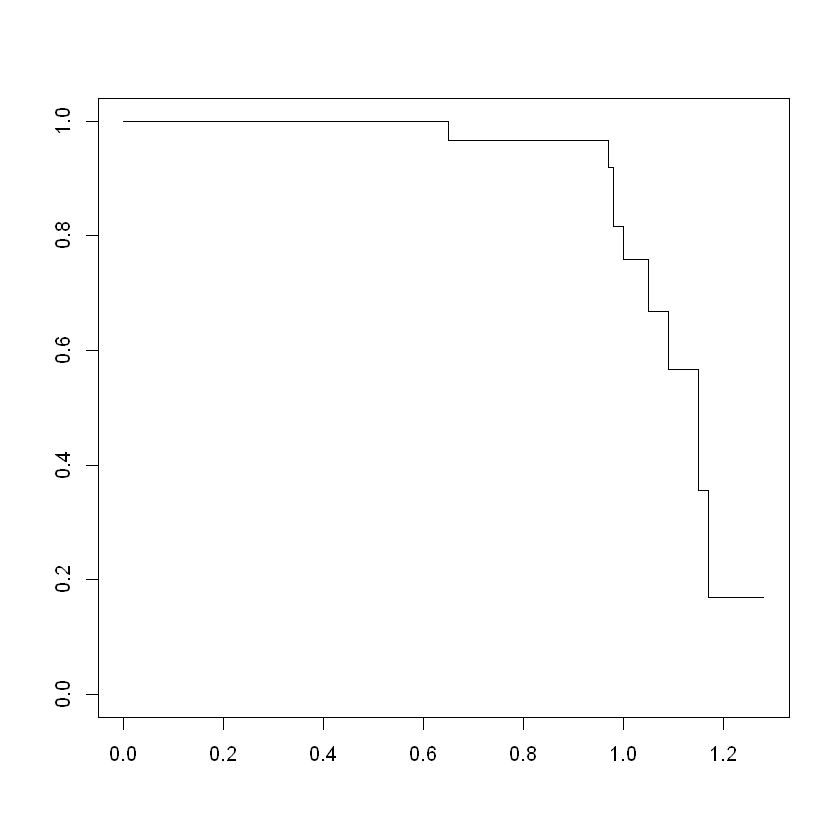

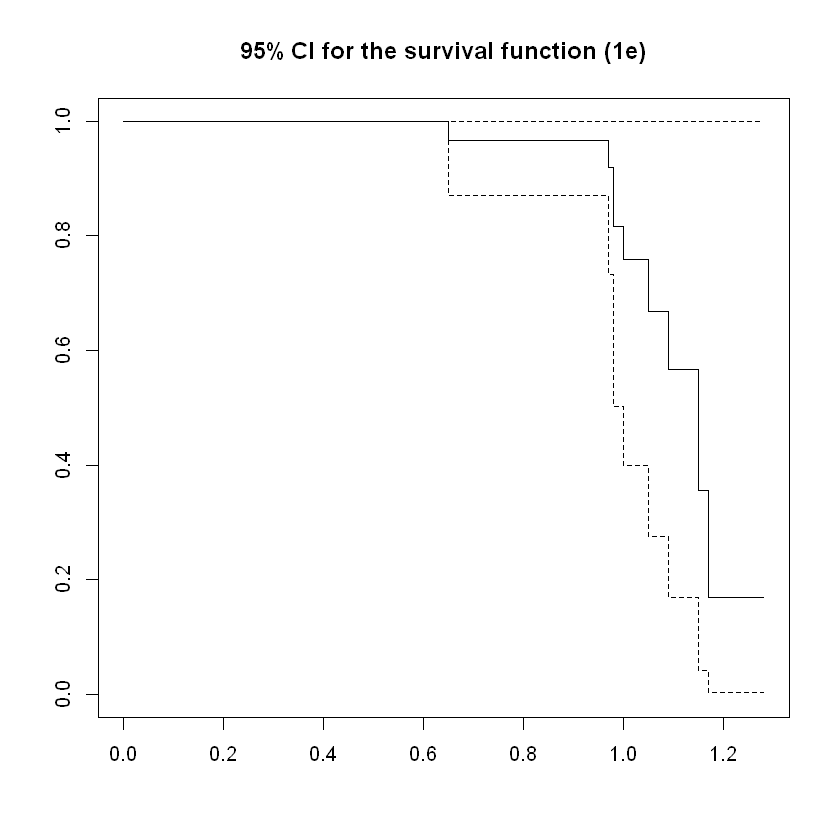

In [7]:
### e)

model.interaction<-coxph(Surv(survival, complete)~wedge+peelForce+interBelt+wedge:peelForce, data=data)
summary(model.interaction)

newdata<-data.frame(wedge=0.6, peelForce=0.8, interBelt=0.7)
sf<-survfit(model.interaction, newdata=newdata)
summary(sf, times=1.00)
plot(sf, conf.int=c("none"))
plot(sf, main="95% CI for the survival function (1e)")

# Call: survfit(formula = model.interaction, newdata = newdata)
# 
# time n.risk n.event survival std.err lower 95% CI upper 95% CI
# 1     17       5    0.759   0.248          0.4            1

Covariate             Mean       Coef     Rel.Risk   S.E.    LR p
wedge                 0.984    -6.270     0.002     2.301   0.0032 

Events                    11 
Total time at risk         33.99 
Max. log. likelihood      -0.61895 
LR test statistic         8.68 
Degrees of freedom        1 
Overall p-value           0.00321895

wedge log(scale) log(shape) 
 -6.269568  -0.320806   2.348457

wedge 
-6.269568

wedge 
528.2491

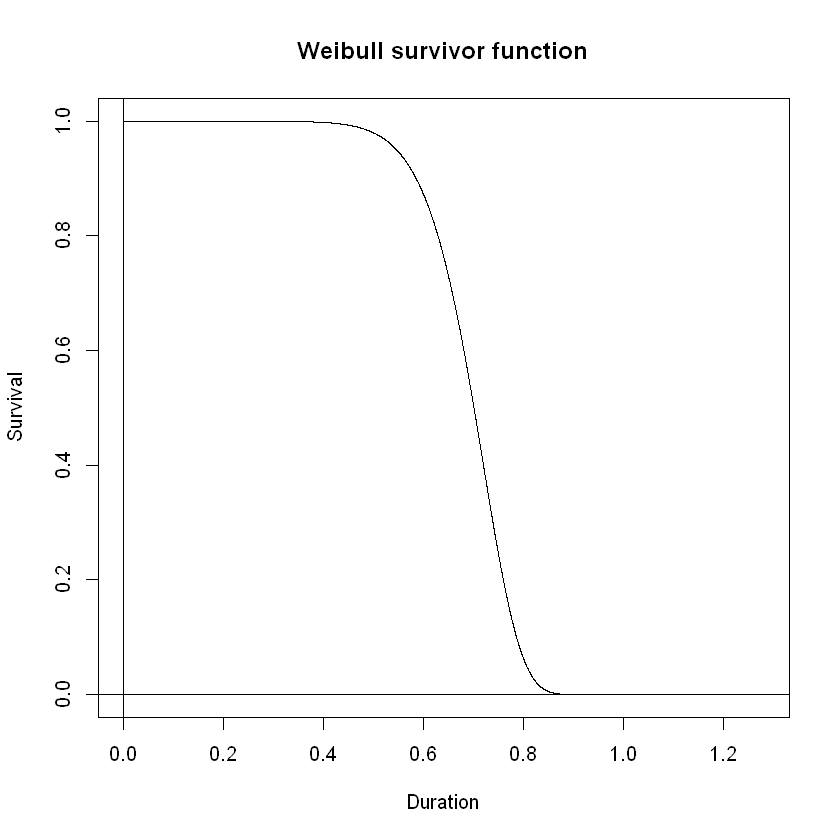

In [27]:
### 2

### a)

library(eha)

model.weibull<-phreg(Surv(survival, complete)~wedge, data=data, dist="weibull")
summary(model.weibull)

plot(model.weibull, fn="sur")

model.weibull$coefficients

#     wedge log(scale) log(shape) 
# -6.269568  -0.320806   2.348457

beta<-coef(model.weibull)[1] # -6.269568 - beta
hr<-exp(beta*0.6)/exp(beta*1.6) # 528.2491
beta
hr



In [29]:
### b)

p<-exp(coef(model.weibull)[3])  # shape
lambda<-exp(coef(model.weibull)[2]) # -scale
beta<-coef(model.weibull)[1]
x<-1.6
lambda.star<-lambda/exp((x*beta)/p)

# estimate of the expected value when x = 1.6
mu<-lambda.star*gamma(1+(1/p)) 

# log(scale) 
# 1.80289  
mu

log(scale) 
   1.80289

In [30]:
### c)
p<-exp(coef(model.weibull)[3])  # shape
lambda<-exp(coef(model.weibull)[2]) # scale
beta<-coef(model.weibull)[1]
x <- 1.6
lambda.star<-lambda/exp((x*beta)/p)

# 80% prediction interval
t.star<-rweibull(10000, shape=p, scale=lambda.star)
lowerbound<-quantile(t.star, c(0.1))
upperbound<-quantile(t.star, c(0.9))
lowerbound
upperbound

# > lowerbound
# 10% 
# 1.523973 
# > upperbound
# 90% 
# 2.045816

# another way
qweibull(0.1, shape=p, scale=lambda.star)
qweibull(0.9, shape=p, scale=lambda.star)

# > qweibull(0.1, shape=p, scale=lambda.star1)
# [1] 1.525621
# > qweibull(0.9, shape=p, scale=lambda.star1)
# [1] 2.048305

10% 
1.524477

90% 
2.047076

[1] 1.525621

[1] 2.048305

Single term deletions

Model:
Surv(survival, complete) ~ wedge + peelForce + interBelt + wedge:peelForce
                Df  AIC   LRT Pr(>Chi)
<none>             9.41               
interBelt        1 9.68 2.268     0.13
wedge:peelForce  1 7.68 0.276     0.60

Covariate             Mean       Coef     Rel.Risk   S.E.    Wald p
wedge                 0.984    -8.103     0.000     9.150   0.3759 
peelForce             0.973   -13.875     0.000    13.219   0.2939 
interBelt             0.999    -2.542     0.079     1.675   0.1292 
wedge:peelForce  
   :                          8.136  3414.842    12.823    0.5258 

Events                    11 
Total time at risk         33.99 
Max. log. likelihood      1.2958 
LR test statistic         12.51 
Degrees of freedom        4 
Overall p-value           0.013944

wedge       peelForce       interBelt wedge:peelForce      log(scale) 
      -8.102549      -13.875215       -2.541699        8.135886       -1.082368 
     log(shape) 
       2.432556

[1] 0.8017371

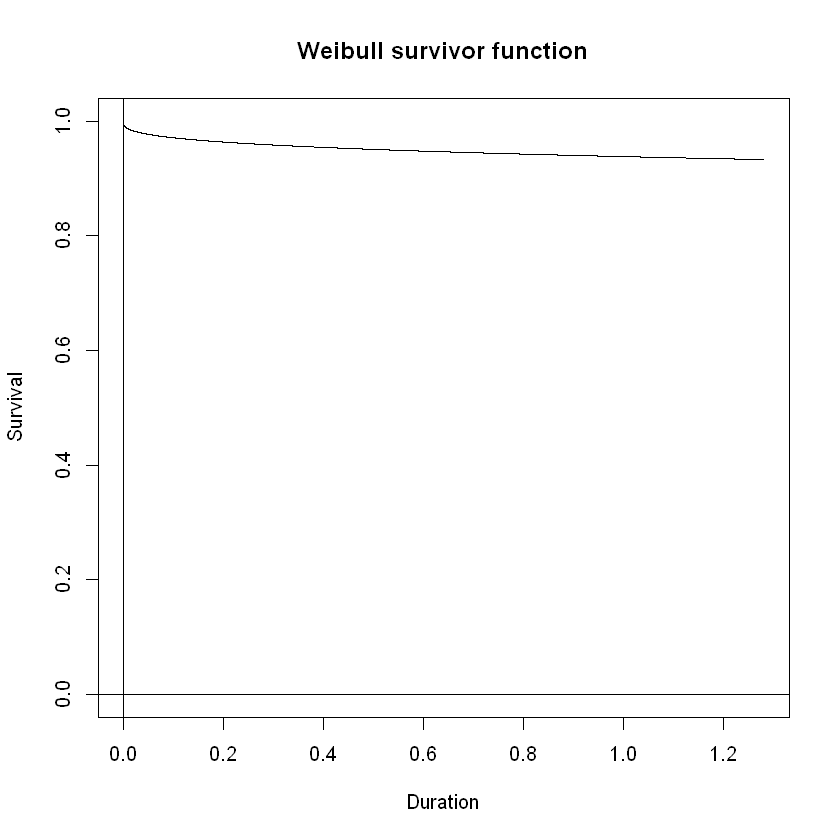

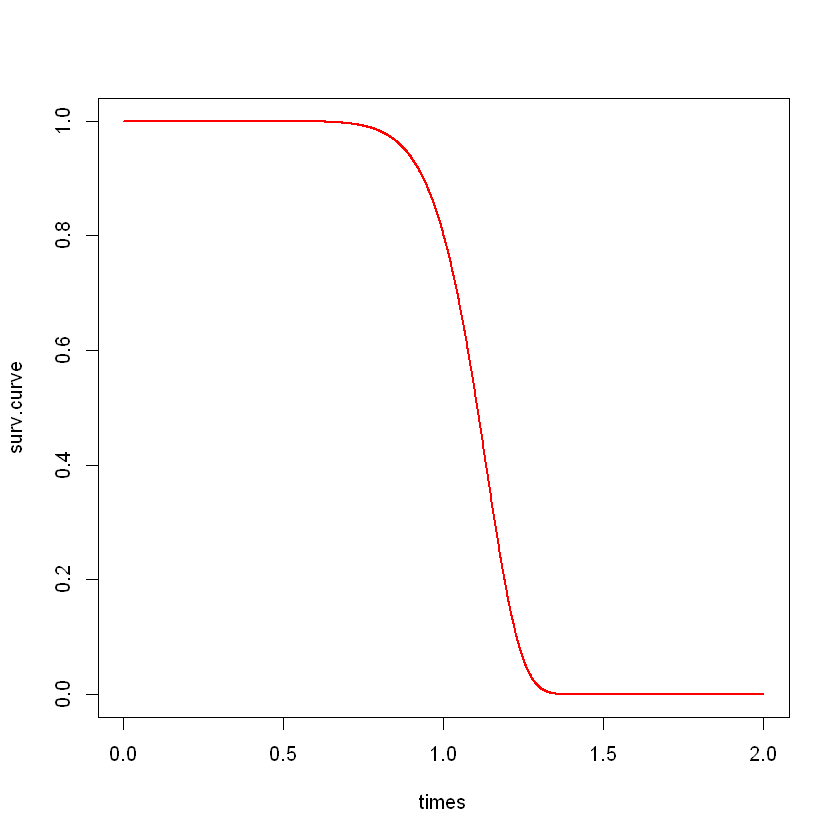

In [31]:
### d)

model.wph<-phreg(Surv(survival, complete)~wedge+peelForce+interBelt+wedge:peelForce, data=data, dist="weibull")
summary(model.wph)
plot(model.wph, fn = "sur")

model.wph$coefficients
#    wedge       peelForce       interBelt wedge:peelForce      log(scale)      log(shape) 
# -8.102549      -13.875215       -2.541699        8.135886       -1.082368        2.432556 

p<-exp(coef(model.wph)[6])
lambda<-exp(coef(model.wph)[5])
beta1<-coef(model.wph)[1]
beta2<-coef(model.wph)[2]
beta3<-coef(model.wph)[3]
beta4<-coef(model.wph)[4]

x1<-0.6
x2<-0.8
x3<-0.7

x.beta<-sum(c(beta1*x1, beta2*x2, beta3*x3, beta4*x1*x2))

lambda.star<-lambda/exp((x.beta)/p) # 1.14176

survival.wph<-1-pweibull(1.00, shape=p, scale=lambda.star)
survival.wph  # 0.8017371

# plot of the survival curve
times<-seq(0,2,0.001)
surv.curve <- 1 - pweibull(times, shape=p, scale=lambda.star)
plot(times, surv.curve, type="n")
lines(times, surv.curve, col="red",lwd=2)

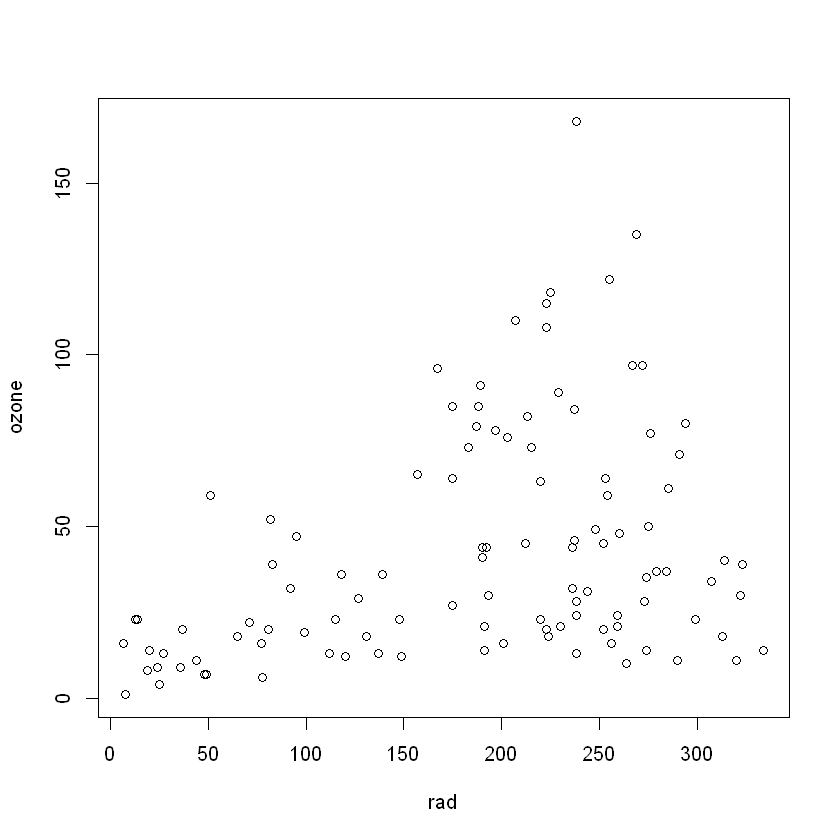

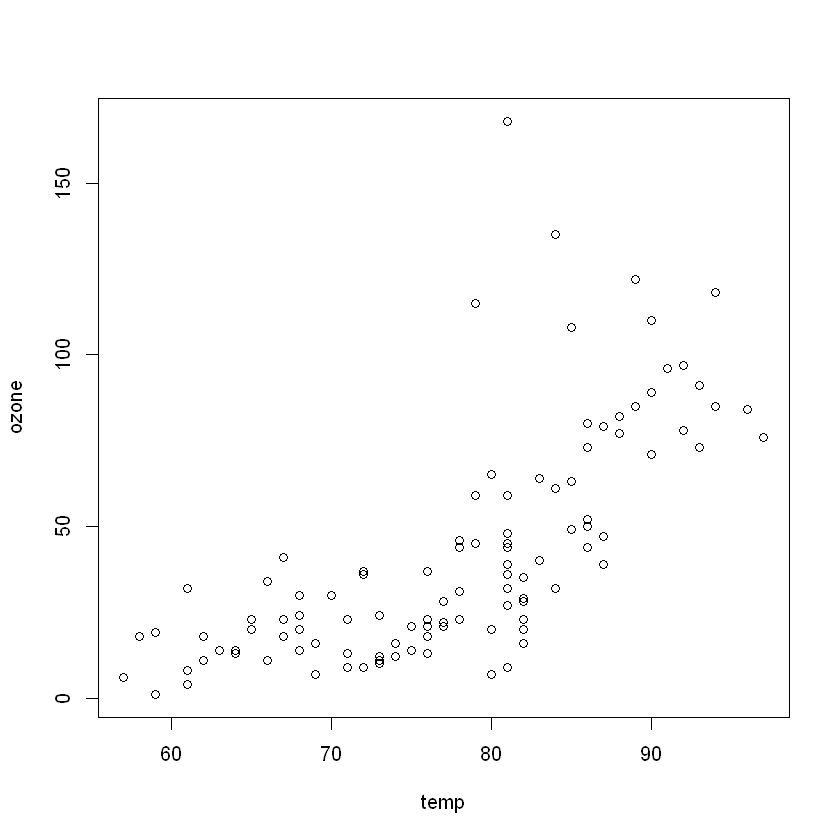

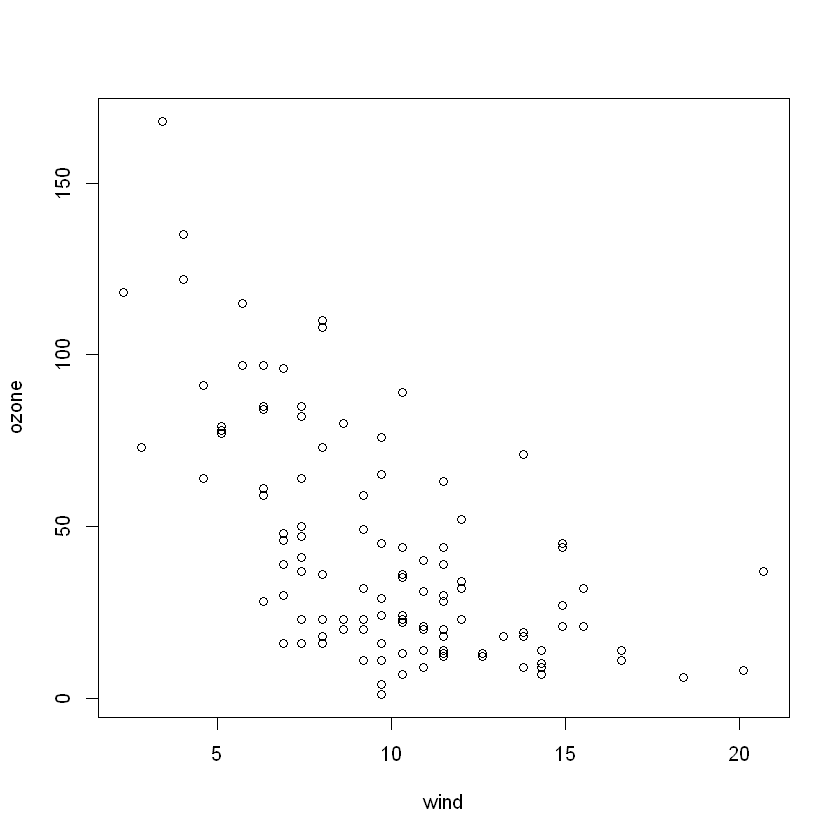

In [32]:
### 3

data<-read.table("ozone.txt", sep="\t", dec=".", header=TRUE)
attach(data)

plot(rad, ozone)
plot(temp, ozone)
plot(wind, ozone)


Call:
glm(formula = ozone ~ rad + temp + wind, family = poisson(link = "log"), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.5252  -2.0131  -0.5224   1.5679   9.2235  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.598763   0.194929   3.072  0.00213 ** 
rad          0.002256   0.000208  10.849  < 2e-16 ***
temp         0.042734   0.002054  20.803  < 2e-16 ***
wind        -0.082437   0.005218 -15.799  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 2627.14  on 110  degrees of freedom
Residual deviance:  751.91  on 107  degrees of freedom
AIC: 1344

Number of Fisher Scoring iterations: 4



Call:
glm(formula = ozone ~ rad + temp + wind, family = poisson(link = "sqrt"), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.9021  -2.4564  -0.6801   1.5984  10.1260  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.5270292  0.5441574  -4.644 3.42e-06 ***
rad          0.0049831  0.0005473   9.104  < 2e-16 ***
temp         0.1276424  0.0059846  21.329  < 2e-16 ***
wind        -0.2128272  0.0154411 -13.783  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 2627.14  on 110  degrees of freedom
Residual deviance:  887.02  on 107  degrees of freedom
AIC: 1479.2

Number of Fisher Scoring iterations: 15


[1] 1344.042

[1] 1479.157


Call:
glm(formula = ozone ~ rad + temp + wind, family = quasipoisson(link = "log"), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.5252  -2.0131  -0.5224   1.5679   9.2235  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.5987632  0.5363043   1.116 0.266725    
rad          0.0022565  0.0005723   3.943 0.000144 ***
temp         0.0427339  0.0056518   7.561 1.45e-11 ***
wind        -0.0824367  0.0143562  -5.742 8.84e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for quasipoisson family taken to be 7.569564)

    Null deviance: 2627.14  on 110  degrees of freedom
Residual deviance:  751.91  on 107  degrees of freedom
AIC: NA

Number of Fisher Scoring iterations: 4


[1] 7.569564


Call:
glm.nb(formula = ozone ~ rad + temp + wind, data = data, init.theta = 6.186226482, 
    link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7059  -0.8786  -0.2243   0.5731   2.5793  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.4091405  0.4915337   0.832    0.405    
rad          0.0021413  0.0004967   4.311 1.63e-05 ***
temp         0.0439113  0.0053641   8.186 2.70e-16 ***
wind        -0.0698412  0.0138994  -5.025 5.04e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Negative Binomial(6.1862) family taken to be 1)

    Null deviance: 363.43  on 110  degrees of freedom
Residual deviance: 118.63  on 107  degrees of freedom
AIC: 918.8

Number of Fisher Scoring iterations: 1


              Theta:  6.19 
          Std. Err.:  1.02 

 2 x log-likelihood:  -908.80 


Call:
glm.nb(formula = ozone ~ rad + temp + wind + rad:temp, data = data, 
    init.theta = 6.324460451, link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.9963  -0.8546  -0.2485   0.4595   2.4867  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.614e+00  8.737e-01   1.847   0.0647 .  
rad         -4.484e-03  3.956e-03  -1.133   0.2571    
temp         2.725e-02  1.134e-02   2.403   0.0163 *  
wind        -6.978e-02  1.376e-02  -5.070 3.99e-07 ***
rad:temp     8.986e-05  5.317e-05   1.690   0.0910 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Negative Binomial(6.3245) family taken to be 1)

    Null deviance: 370.17  on 110  degrees of freedom
Residual deviance: 117.96  on 106  degrees of freedom
AIC: 918.1

Number of Fisher Scoring iterations: 1


              Theta:  6.32 
          Std. Err.:  1.05 

 2 x log-likelihood:  -906.10 


Call:
glm.nb(formula = ozone ~ rad + temp + wind + rad:temp + temp:wind, 
    data = data, init.theta = 6.377254078, link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8785  -0.8992  -0.3112   0.5484   2.4973  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)  
(Intercept)  2.468e-02  1.506e+00   0.016   0.9869  
rad         -2.818e-03  4.104e-03  -0.687   0.4923  
temp         4.743e-02  1.918e-02   2.473   0.0134 *
wind         5.578e-02  1.024e-01   0.545   0.5859  
rad:temp     6.768e-05  5.511e-05   1.228   0.2195  
temp:wind   -1.601e-03  1.288e-03  -1.243   0.2138  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Negative Binomial(6.3773) family taken to be 1)

    Null deviance: 372.73  on 110  degrees of freedom
Residual deviance: 117.24  on 105  degrees of freedom
AIC: 918.62

Number of Fisher Scoring iterations: 1


              Theta:  6.38 
          Std. Err.:  1.05 

 2 x log

[1] 918.7996

[1] 918.1004

[1] 918.621

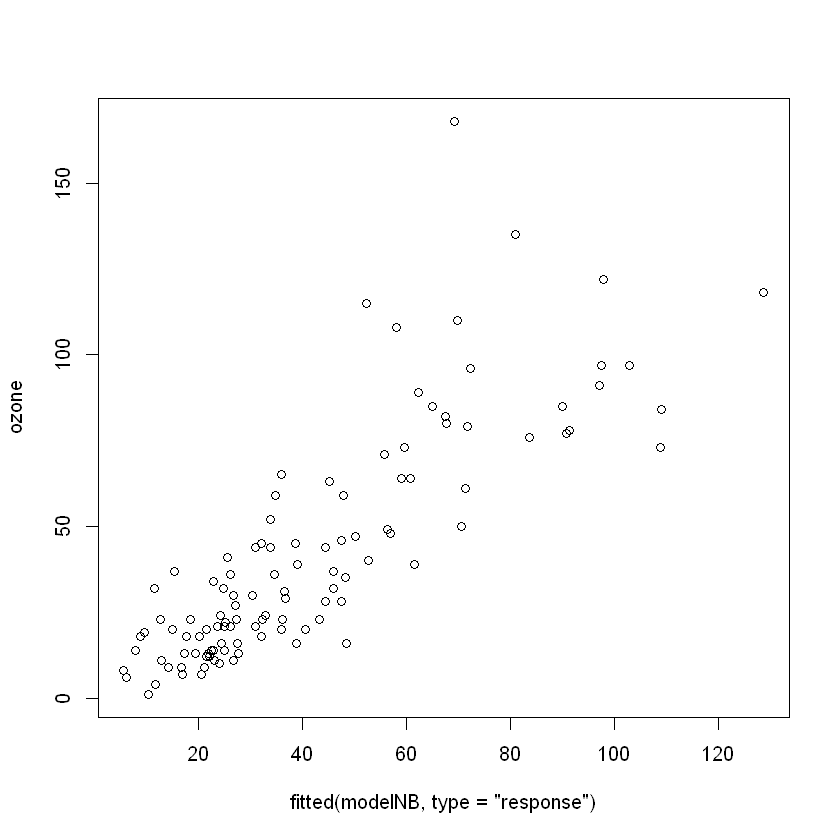

In [33]:
### a)
# Since the response variable Y happens to be in integer level, the default 
# distribution for Y is a poisson distribution.

model.1<-glm(ozone~rad+temp+wind, family=poisson(link="log"), data=data)
summary(model.1)

model.2<-glm(ozone~rad+temp+wind, family=poisson(link="sqrt"), data=data)
summary(model.2)

AIC(model.1) # better fits the data
AIC(model.2)
# > AIC(model.1)
# [1] 1344.042
# > AIC(model.2)
# [1] 1479.157

# investigate the value of the dispersion parameter
model.quasi1<-glm(ozone~rad+temp+wind, family=quasipoisson(link="log"), data=data)
summary(model.quasi1)
summary(model.quasi1)$dispersion
# [1] 7.569564

# Since the dispersion_parameter > 1, the model.quasi1 is said to have overdispersion.
# In this case, the negative binomial is an alternative.

library(MASS)
modelNB<-glm.nb(ozone~rad+temp+wind, data=data) # log link function is default here
summary(modelNB)

plot(fitted(modelNB, type="response"), ozone)

modelNB.1<-glm.nb(ozone~rad+temp+wind+rad:temp, data=data) # log link function is default here
summary(modelNB.1)

# check for interaction
modelNB.2<-glm.nb(ozone~rad+temp+wind+rad:temp+temp:wind, data=data) # log link function is default here
summary(modelNB.2)

AIC(modelNB)
AIC(modelNB.1)
AIC(modelNB.2)


# > AIC(modelNB)
# [1] 918.7996
# > AIC(modelNB.1)
# [1] 918.1004
# > AIC(modelNB.2)
# [1] 918.621

# The best model is modelNB.1

In [34]:
### b)

newdata<-data.frame(rad=100, temp=70, wind=15.5) 
pred<-predict(modelNB.1, newdata=newdata, type="response") # point prediction = 13.74741 


eta.hat<-predict(modelNB.1, newdata=newdata, type="link") # 2.620851
xf<-t(cbind(1,100,70,15.5,100*70))
cov.eta<-as.numeric(t(xf)%*%vcov(modelNB.1)%*%xf)
eta.star<-rnorm(10000, mean=eta.hat, sd=sqrt(cov.eta))
mu.star<-exp(eta.star)

yf.star<-rpois(10000, lambda=mu.star)

# prediction intervals
lowerY.bound<-quantile(yf.star, c(0.025,0.05,0.1))
upperY.bound<-quantile(yf.star, 1-c(0.025,0.05,0.1))
lowerY.bound
upperY.bound

# 2.5%   5%  10% 
# 7    8    9 
# > upperY.bound
# 97.5%   95%   90% 
# 22    20    19 


2.5%   5%  10% 
   7    8    9

97.5%   95%   90% 
   22    21    19

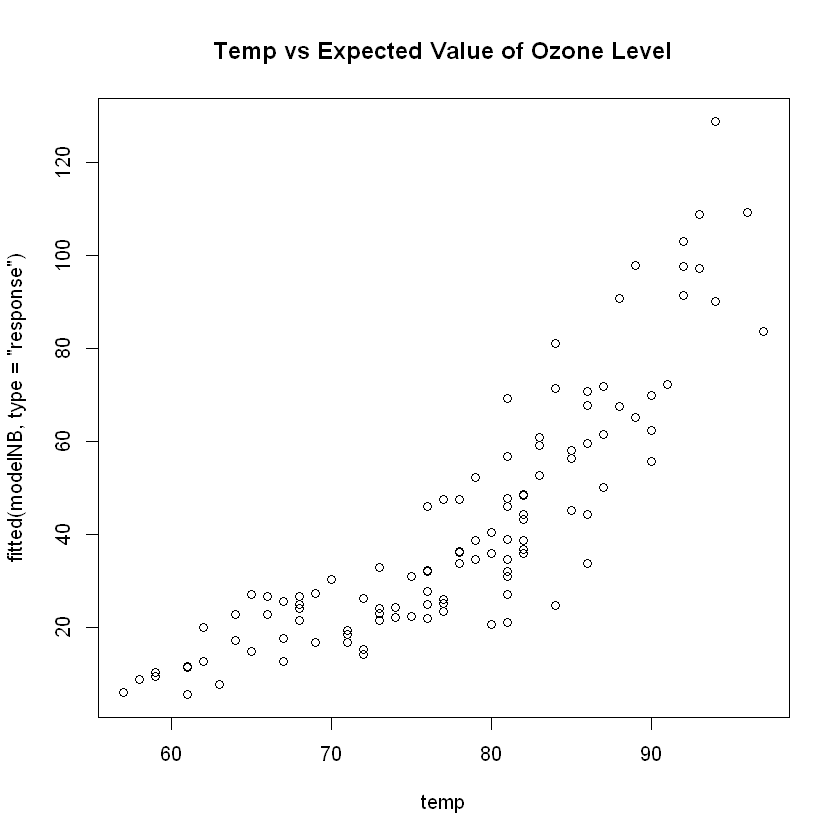

In [35]:
### c)

plot(temp, fitted(modelNB, type="response"), main="Temp vs Expected Value of Ozone Level")

# From the plot graph, the ozone level seems to be increasing linearly as
# the temp increases.

In [36]:
### d)

model.H0<-glm.nb(ozone~temp+wind, data=data)
summary(model.H0)

model.H1<-glm.nb(ozone~rad+temp+wind, data=data)
summary(model.H1)


library(lmtest)
lrtest(model.H0, model.H1)
lrtest(model.H0, model.H1)$Chisq[2] # value of the test statistic
# 15.70837

# Likelihood ratio test
# 
# Model 1: ozone ~ temp + wind
# Model 2: ozone ~ rad + temp + wind
# #Df  LogLik Df  Chisq Pr(>Chisq)    
# 1   4 -462.25                         
# 2   5 -454.40  1 15.708   7.39e-05 ***

# Since the p-value < 0.05, we reject the null hypothese, and thus X1=rad 
# is statistically significance.



Call:
glm.nb(formula = ozone ~ temp + wind, data = data, init.theta = 5.190238976, 
    link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.9399  -0.7712  -0.1312   0.4228   2.6351  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.354039   0.526066   0.673    0.501    
temp         0.049659   0.005575   8.908  < 2e-16 ***
wind        -0.067752   0.014902  -4.546 5.46e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Negative Binomial(5.1902) family taken to be 1)

    Null deviance: 313.45  on 110  degrees of freedom
Residual deviance: 117.93  on 108  degrees of freedom
AIC: 932.51

Number of Fisher Scoring iterations: 1


              Theta:  5.190 
          Std. Err.:  0.825 

 2 x log-likelihood:  -924.508 


Call:
glm.nb(formula = ozone ~ rad + temp + wind, data = data, init.theta = 6.186226482, 
    link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7059  -0.8786  -0.2243   0.5731   2.5793  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.4091405  0.4915337   0.832    0.405    
rad          0.0021413  0.0004967   4.311 1.63e-05 ***
temp         0.0439113  0.0053641   8.186 2.70e-16 ***
wind        -0.0698412  0.0138994  -5.025 5.04e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Negative Binomial(6.1862) family taken to be 1)

    Null deviance: 363.43  on 110  degrees of freedom
Residual deviance: 118.63  on 107  degrees of freedom
AIC: 918.8

Number of Fisher Scoring iterations: 1


              Theta:  6.19 
          Std. Err.:  1.02 

 2 x log-likelihood:  -908.80 

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




,#Df,LogLik,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,4,-462.2540,NA,NA,NA
2,5,-454.3998,1,15.70837,7.389664e-05


[1] 15.70837